In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# %matplotlib inline

In [9]:
######################################Change These Lines########################################
# df = pd.read_csv("AML_NOnormal_ReadPerCell_12runs.tab",sep="\t",index_col=0)
# panelName = "AML"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/CLL_NOnormal_ReadPerCell.tab",sep="\t",index_col=0)
# panelName = "CLL"
# df = pd.read_csv("MYE_NOnormal_ReadPerCell_4runs.tab",sep="\t",index_col=0)
# panelName = "MYE"
df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/TP1_NOnormal_ReadPerCell.tab",sep="\t",index_col=0)
panelName = "TP1"
# df = pd.read_csv("tp50_NOnormal.tab",sep="\t",index_col=0)
# panelName = "THP50subset"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/TP3_NOnormal_ReadPerCell.tab",sep="\t",index_col=0)
# panelName = "TP3"
# df4 = pd.read_csv("TP6_NOnormal_ReadPerCell_2runs.tab",sep="\t",index_col=0)
# panelName = "TP6"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/TP5_NOnormal_ReadPerCell.tab",sep="\t",index_col=0)
# panelName = "TP5"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/TP4_NOnormal_ReadPerCell.tab",sep="\t",index_col=0)
# panelName = "TP4"
# df3 = pd.read_csv("THP100subset_NOnormal_ReadPerCell_2runs.tab",sep="\t",index_col=0)
# panelName = "THP100subset"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/tp50_bothBeads_readsPerCell.tab",sep="\t",index_col=0)
# panelName = "THP50subsetBothBeads"
# df = pd.read_csv("/Users/saurabhgulati/v2DataAnalysis/plots/tp50All416bCombinedAgain.tab",sep="\t",index_col=0)
# panelName = "THP50subset416bOnly"
# df = pd.read_csv(sys.argv[1],sep="\t",index_col=0)
# panelName = sys.argv[2]
################################################################################################
# df = df1.join([df2,df3,df4],how="outer")

# panelName = "allTPsubsets"
dfInternalyNormalized = df.copy()
dfExternalyNormalized = df.copy()
overallMean = df.mean().mean()
for i in list(df):
    dfInternalyNormalized[i] = dfInternalyNormalized[i]/dfInternalyNormalized[i].mean()

dfExternalyNormalized = dfExternalyNormalized/overallMean

# dfExternalyNormalized = dfExternalyNormalized.sort_values(by=list(df)[1:])
# dfInternalyNormalized = dfInternalyNormalized.sort_values(by=list(df)[1:])
dfExternalyNormalized = dfExternalyNormalized.sort_values(by=list(df)[0])
dfInternalyNormalized = dfInternalyNormalized.sort_values(by=list(df)[0])
# df

dfInternalRanks = dfInternalyNormalized.copy()
for i in list(dfInternalRanks):
    temp = dfInternalRanks[i].sort_values(ascending=False).index
    for j in range(len(temp)):
        dfInternalRanks[i][temp[j]] = j + 1

dfInternalRanks = dfInternalRanks.sort_values(by=list(df)[0])

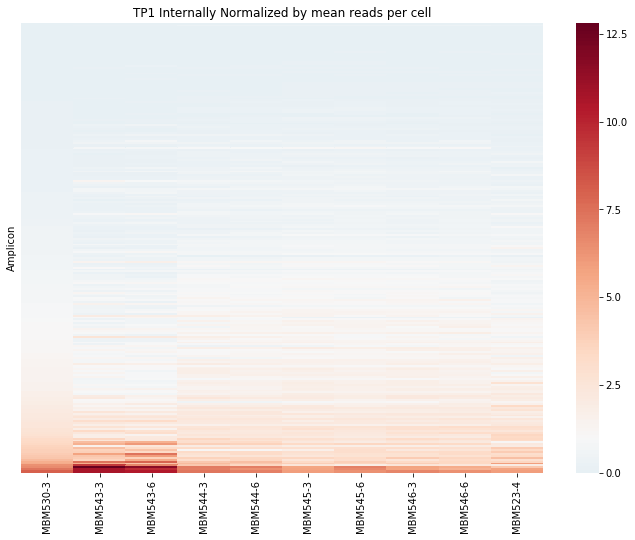

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(dfInternalyNormalized,cmap="RdBu_r",ax=ax, yticklabels=False,center=1).set_title(panelName+" Internally Normalized by mean reads per cell")
# plt.savefig("allThpPanelsOverlap.png")
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_internallyNormalized_ampMeans_heatmap.png")


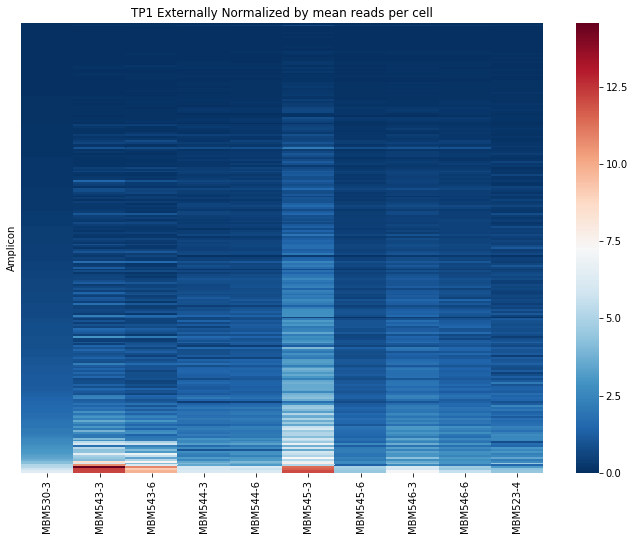

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(dfExternalyNormalized,cmap="RdBu_r",ax=ax, yticklabels=False).set_title(panelName+" Externally Normalized by mean reads per cell")
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_externallyNormalized_ampMeans_heatmap.png")

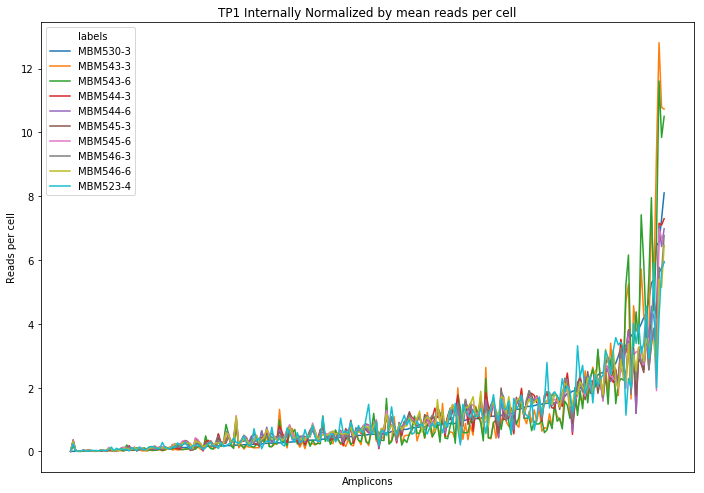

In [12]:
temp = []
names = []
ampNames = []
for i in list(df):
    temp.extend(dfInternalyNormalized[i].tolist())
    names.extend(np.repeat(i,len(df[i])).tolist())
    ampNames.extend(dfInternalyNormalized[i].index.tolist())
test = {'Reads per cell':temp, 'labels':names, 'Amplicons':ampNames}
df1 = pd.DataFrame.from_dict(test)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x="Amplicons",y="Reads per cell",hue="labels",data=df1,ax=ax,sort=False).set_title(panelName+" Internally Normalized by mean reads per cell")
ax.xaxis.set_tick_params(rotation=90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_internallyNormalized_ampMeans_lineplot.png")

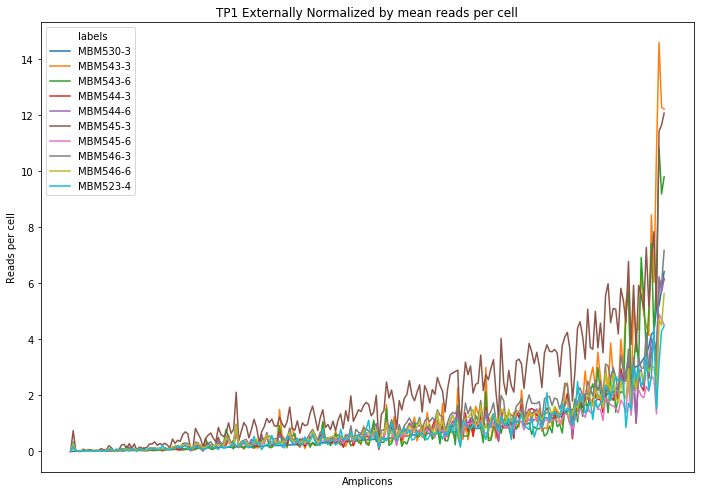

In [13]:
temp = []
names = []
ampNames = []
for i in list(df):
    temp.extend(dfExternalyNormalized[i].tolist())
    names.extend(np.repeat(i,len(df[i])).tolist())
    ampNames.extend(dfExternalyNormalized[i].index.tolist())
test = {'Reads per cell':temp, 'labels':names, 'Amplicons':ampNames}
df1 = pd.DataFrame.from_dict(test)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x="Amplicons",y="Reads per cell",hue="labels",data=df1,ax=ax,sort=False).set_title(panelName+" Externally Normalized by mean reads per cell")
ax.xaxis.set_tick_params(rotation=90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_externallyNormalized_ampMeans_lineplot.png")

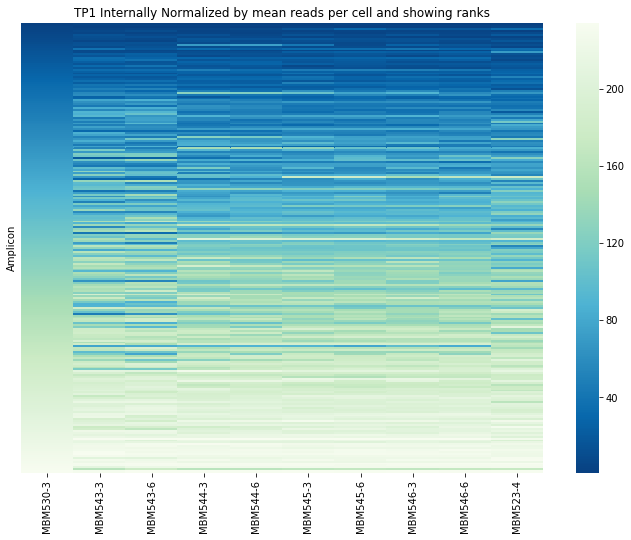

In [14]:

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(dfInternalRanks,cmap="GnBu_r",ax=ax, yticklabels=False).set_title(panelName+" Internally Normalized by mean reads per cell and showing ranks")
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_internallyNormalized_ranks_heatmap.png")

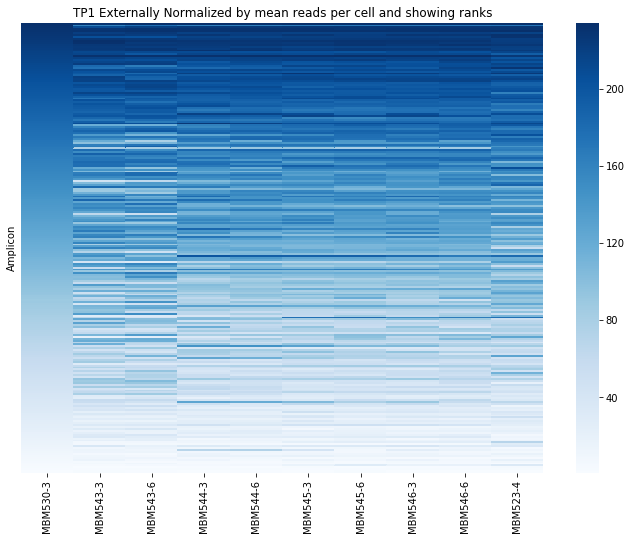

In [15]:
for i in list(dfExternalyNormalized):
    temp = dfExternalyNormalized[i].sort_values(ascending=False).index
    for j in range(len(temp)):
        dfExternalyNormalized[i][temp[j]] = j + 1
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(dfExternalyNormalized,cmap="Blues",ax=ax, yticklabels=False).set_title(panelName+" Externally Normalized by mean reads per cell and showing ranks")
plt.savefig('/Users/saurabhgulati/v2DataAnalysis/plots/'+panelName + "_externallyNormalized_ranks_heatmap.png")